In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
btc_tweets = pd.read_csv('Bitcoin_tweets.csv')
btc_tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [3]:
btc_text = btc_tweets[['text', 'date']]
btc_text.loc[:, 'text'] = btc_text['text'].str.lower()
btc_text.dropna(inplace=True)
btc_text

,text,date
0,blue ridge bank shares halted by nyse after #b...,2021-02-10 23:59:04
1,"😎 today, that's this #thursday, we will do a ""...",2021-02-10 23:58:48
2,"guys evening, i have read this article about b...",2021-02-10 23:54:48
3,$btc a big chance in a billion! price: \487264...,2021-02-10 23:54:33
4,this network is secured by 9 508 nodes as of t...,2021-02-10 23:54:06
...,...,...
1232804,@speedupbsc @debi_pada @adatiers @golf_grinder...,2021-09-10 21:15:34
1232805,"this time, what will happen between the us sec...",2021-09-10 21:15:33
1232806,one #btc is only 205 #egld.,2021-09-10 21:15:04
1232807,want to join a group that posted tsla 745p day...,2021-09-10 21:14:46


In [4]:
#приводим дату к нужному формату
btc_text = btc_text[~btc_text['date'].str.contains('[a-zA-Z]')]
btc_text['date'] = pd.to_datetime(btc_text['date'], format='%Y-%m-%d')
btc_text['date'] = btc_text['date'].dt.strftime('%Y-%m-%d')
btc_text['date']

0          2021-02-10
1          2021-02-10
2          2021-02-10
3          2021-02-10
4          2021-02-10
              ...    
1232804    2021-09-10
1232805    2021-09-10
1232806    2021-09-10
1232807    2021-09-10
1232808    2021-09-10
Name: date, Length: 1232799, dtype: object

In [5]:
#за каждый день берем 100 твитов (весь датасет слишком большой)
df_list = []
for _, frame in btc_text.groupby(by='date'):
    temp = frame.sample(100)
    df_list.append(temp)

In [6]:
btc_text = pd.concat(df_list)

In [7]:
import re
#заменяем сокращения
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}


contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

btc_text['text']=btc_text['text'].apply(lambda x:expand_contractions(x))

In [8]:
import string
#убираем числа, знаки пунктуации и лишние пробелы
btc_text['cleaned']=btc_text['text'].apply(lambda x: re.sub('\w*\d\w*','', x))
btc_text['cleaned']=btc_text['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
btc_text['cleaned']=btc_text['cleaned'].apply(lambda x: re.sub(' +',' ',x))# Removing extra spaces
btc_text.head()

,text,date,cleaned
19987,break out of $ftm is almost confirmed. should ...,2021-02-05,break out of ftm is almost confirmed should gi...
20701,https://t.co/ztrvm4uec2\n\naluminum shipments ...,2021-02-05,httpstco\n\naluminum shipments from mine to ma...
20473,have you seen our #bitcoin analytics page? \n\...,2021-02-05,have you seen our bitcoin analytics page \n\nl...
21481,how many different cryptocurrencies do you own...,2021-02-05,how many different cryptocurrencies do you own...
20351,there is clearly no other way but ↑↑↑↑\n\n#sai...,2021-02-05,there is clearly no other way but ↑↑↑↑\n\nsait...


In [9]:
import spacy
#проводим лемматизацию
nlp = spacy.load('ru_core_news_sm',disable=['parser', 'ner'])
btc_text['lemmatized']=btc_text['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
#строим матрицу частоты слов
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(btc_text['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=btc_text.index

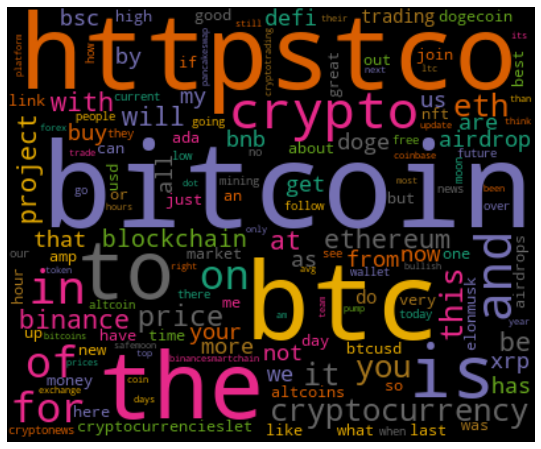

In [11]:
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

#визуалиця частоты слов
def generate_wordcloud(data):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()


generate_wordcloud(df_dtm.sum())

In [12]:
btc_text.reset_index(drop=True, inplace=True)

In [13]:
#выделяем сигналы покупать/продавать
to_buy = btc_text[btc_text['lemmatized'].str.contains('(buy)|(low)|(get)|(free)')].groupby(by='date').count()
to_sell = btc_text[btc_text['lemmatized'].str.contains('(sell)|(high)')].groupby(by='date').count()

<AxesSubplot:xlabel='date'>

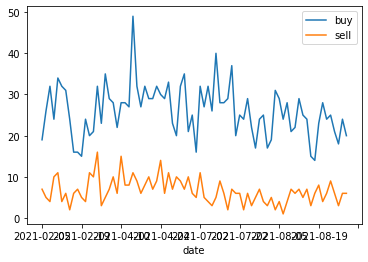

In [14]:
trends = pd.DataFrame({'buy': to_buy['text'], 'sell': to_sell['text']})
trends.plot()

Loaded BCHARTS/KRAKENUSD from cache


<AxesSubplot:xlabel='Date'>

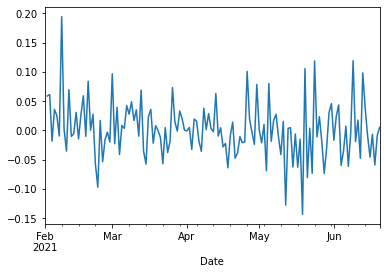

In [15]:
import quandl
import pickle
#загрузка стоимости BTC
def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

btc_usd_price = get_quandl_data('BCHARTS/KRAKENUSD')
btc_usd_price = btc_usd_price.loc['2021-02-01':, :]
btc_usd_price['Close'].pct_change().plot()

In [16]:
def normalize(df):
    return (df - df.mean()) / df.std()

In [17]:
btc_usd_price['Close'].pct_change().index

DatetimeIndex(['2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
               '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08',
               '2021-02-09', '2021-02-10',
               ...
               '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14',
               '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18',
               '2021-06-19', '2021-06-20'],
              dtype='datetime64[ns]', name='Date', length=140, freq=None)

In [18]:
trends.index = pd.to_datetime(trends.index)

<AxesSubplot:xlabel='date'>

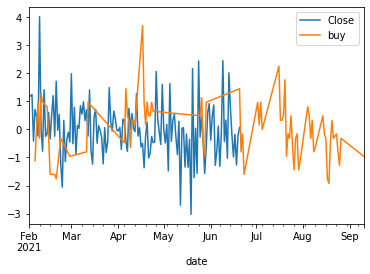

In [19]:
normalize(btc_usd_price['Close'].pct_change()).plot(legend=True)
normalize(trends['buy']).plot(legend=True)

<AxesSubplot:xlabel='date'>

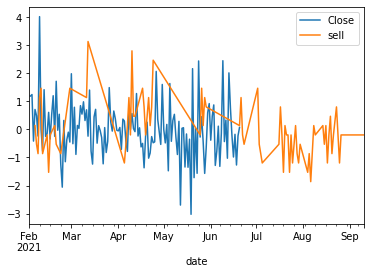

In [20]:
normalize(btc_usd_price['Close'].pct_change()).plot(legend=True)
normalize(trends['sell']).plot(legend=True)

На основе графиков сложно однозначно сказать о справедливости сигналов, но в отдельных днях при увеличении значений `buy`наблюдается рост доходностей, а при увеличении `sell` падение доходностей.